In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import matplotlib.pyplot as plt

In [11]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

Loading Linnerud dataset
DATASET INFORMATION
Feature names (Exercise variables): ['Chins', 'Situps', 'Jumps']
Target names (Physiological variables): ['Weight', 'Waist', 'Pulse']
Data shape: (20, 3)
Number of samples: 20

Dataset description:
.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

:Number of Instances: 20
:Number of Attributes: 3
:Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. dropdown:: References

   * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
     Editions Technic.

ANALYZING SITUPS vs WAISTLINE
Number of data points:

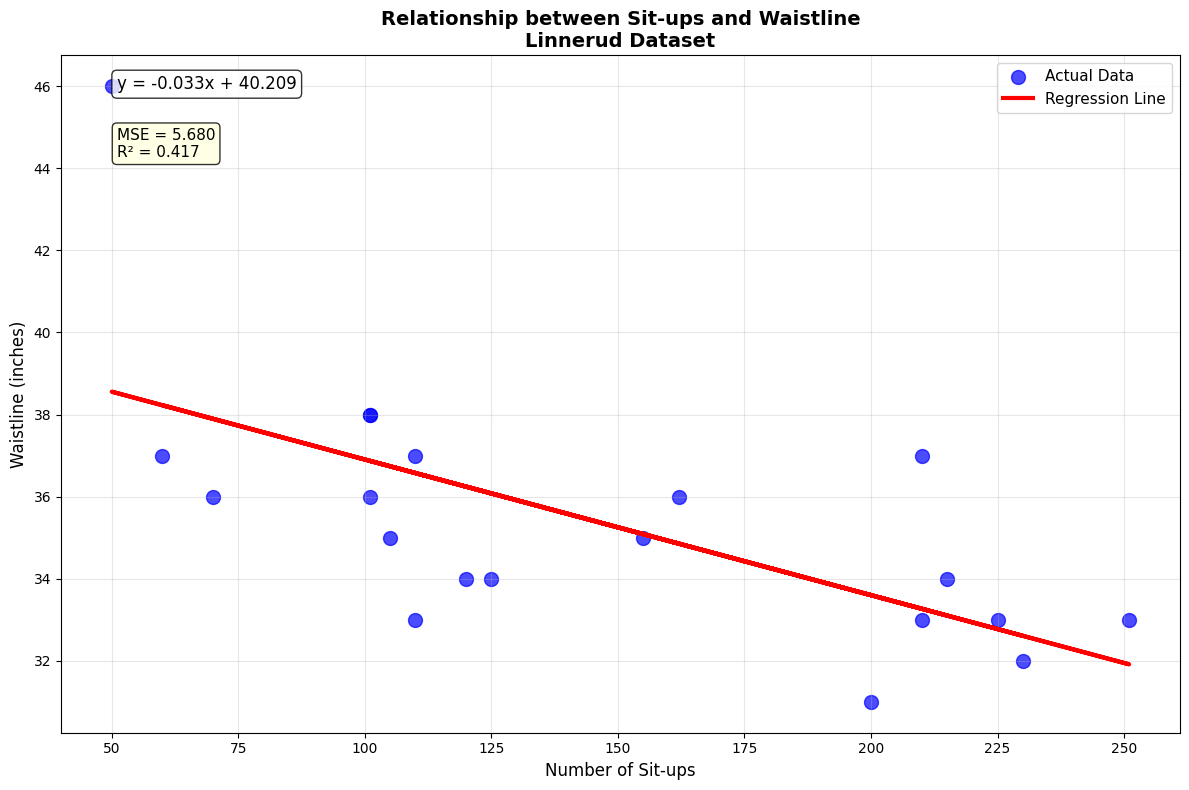

ADDITIONAL ANALYSIS: ALL VARIABLES


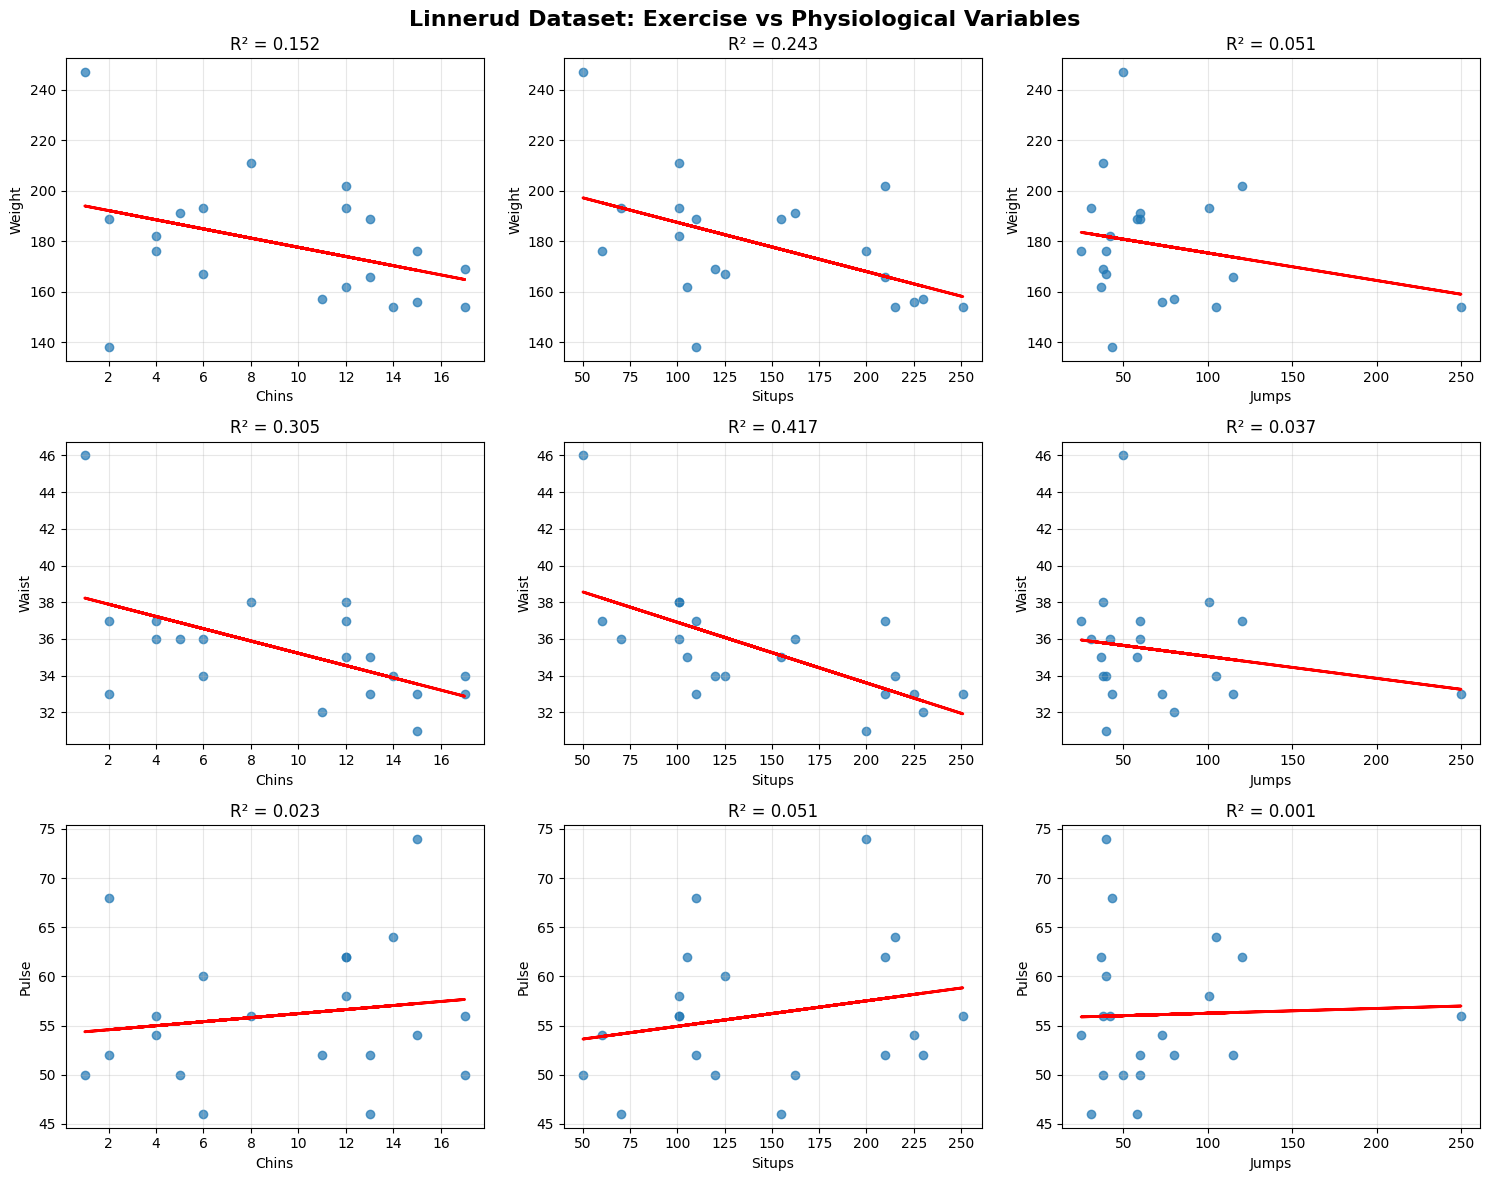

In [5]:
# linnerud_analysis.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_linnerud
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
print("Loading Linnerud dataset")
data = load_linnerud()

# Display dataset information
print("DATASET INFORMATION")
print("Feature names (Exercise variables):", data.feature_names)
print("Target names (Physiological variables):", data.target_names)
print("Data shape:", data.data.shape)
print("Number of samples:", data.data.shape[0])
print("\nDataset description:")
print(data.DESCR)

# Let's analyze the relationship between Situps and Waistline
print("ANALYZING SITUPS vs WAISTLINE")

# Prepare the data: Situps (feature) vs Waistline (target)
X = data.data[:, 1].reshape(-1, 1) 
y = data.target[:, 1]               
print(f"Number of data points: {len(X)}")
print(f"Situps range: {X.min()} to {X.max()}")
print(f"Waistline range: {y.min()} to {y.max()}")

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print("\n MODEL RESULTS ")
print(f"Slope (Coefficient): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Interpret the results
print("\nINTERPRETATION")
print(f"For each additional sit-up, waistline decreases by {abs(model.coef_[0]):.4f} inches")
if model.coef_[0] < 0:
    print("Negative slope: More sit-ups are associated with smaller waistlines")
else:
    print("Positive slope: More sit-ups are associated with larger waistlines")

# Create the visualization
plt.figure(figsize=(12, 8))

# Scatter plot of actual data
plt.scatter(X, y, alpha=0.7, s=100, label='Actual Data', color='blue')

# Regression line
plt.plot(X, predictions, color='red', linewidth=3, label='Regression Line')

# Customize the plot
plt.xlabel('Number of Sit-ups', fontsize=12)
plt.ylabel('Waistline (inches)', fontsize=12)
plt.title('Relationship between Sit-ups and Waistline\nLinnerud Dataset', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Add regression equation to the plot
equation = f'y = {model.coef_[0]:.3f}x + {model.intercept_:.3f}'
plt.annotate(equation, xy=(0.05, 0.95), xycoords='axes fraction', 
            fontsize=12, bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

# Add metrics to the plot
metrics_text = f'MSE = {mse:.3f}\nR² = {r2:.3f}'
plt.annotate(metrics_text, xy=(0.05, 0.85), xycoords='axes fraction',
            fontsize=11, bbox=dict(boxstyle="round,pad=0.3", fc="lightyellow", alpha=0.8))

plt.tight_layout()

# Save the plot
plt.savefig('situps_vs_waistline.png', dpi=300, bbox_inches='tight')
print("\nPlot saved as 'situps_vs_waistline.png'")

# Show the plot
plt.show()

# Additional analysis: Let's look at all variable relationships
print("ADDITIONAL ANALYSIS: ALL VARIABLES")

# Create subplots for all combinations
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Linnerud Dataset: Exercise vs Physiological Variables', fontsize=16, fontweight='bold')

for i in range(3):  # For each target variable
    for j in range(3):  
        ax = axes[i, j]
        
        # Prepare data
        X_feature = data.data[:, j].reshape(-1, 1)
        y_target = data.target[:, i]
        
        # Train model
        model = LinearRegression()
        model.fit(X_feature, y_target)
        y_pred = model.predict(X_feature)
        
        # Plot
        ax.scatter(X_feature, y_target, alpha=0.7)
        ax.plot(X_feature, y_pred, color='red', linewidth=2)
        ax.set_xlabel(data.feature_names[j])
        ax.set_ylabel(data.target_names[i])
        ax.grid(True, alpha=0.3)
        
        # Add R² score
        r2 = model.score(X_feature, y_target)
        ax.set_title(f'R² = {r2:.3f}')

plt.tight_layout()
plt.savefig('all_relationships.png', dpi=300, bbox_inches='tight')
plt.show()